# <center> Data Analysis on Salaries </center> 

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r'Data/ds_salaries.csv')

## Preprocessing

In [6]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.shape

(3755, 11)

In [13]:
df.duplicated().sum()

np.int64(1171)

In [21]:
duplicates=pd.DataFrame(df.value_counts())
duplicates[duplicates['count']>1]

count
work_year experience_level employment_type job_title          salary  salary_currency salary_in_usd employee_residence remote_ratio company_location company_size       
2022      SE               FT              Data Scientist     141525  USD             141525        US                 100          US               M                21
                                                              191475  USD             191475        US                 100          US               M                21
2023      SE               FT              Data Engineer      252000  USD             252000        US                 0            US               M                13
                                                              129000  USD             129000        US                 0            US               M                13
2022      SE               FT              Data Engineer      130000  USD             130000        US                 0            US               M                12
...                                                                                                                                                                  ...
                                           Data Scientist     92000   USD             92000         US                 100          US               L                 2
2023      EX               FT              Data Engineer      235000  USD             235000        US                 0            US               M                 2
          EN               FT              Research Engineer  155000  USD             155000        US                 0            US               M                 2
          SE               FT              Research Scientist 253750  USD             253750        ES                 0            ES               M                 2
2020      EN               FT              Data Engineer      1000000 INR             13493         IN                 100          IN               L                 2

[544 rows x 1 columns]

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(2584, 11)

## Exploratory Data Analytics (EDA)

In [38]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_numeric
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2


1. Which country offers the highest salaries?

In [33]:
# Group by 'employee_residence' and calculate the mean salary in USD for each country
salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean()

# Identify the country with the highest average salary
highest_salary_country = salary_by_country.idxmax()
highest_salary_value = salary_by_country.max()

print(f'The country with the hightest salaries is {highest_salary_country} with an average of ${highest_salary_value} (USD).')


The country with the hightest salaries is IL with an average of $423834.0 (USD).


2. Is the experience level proportional to the salary?

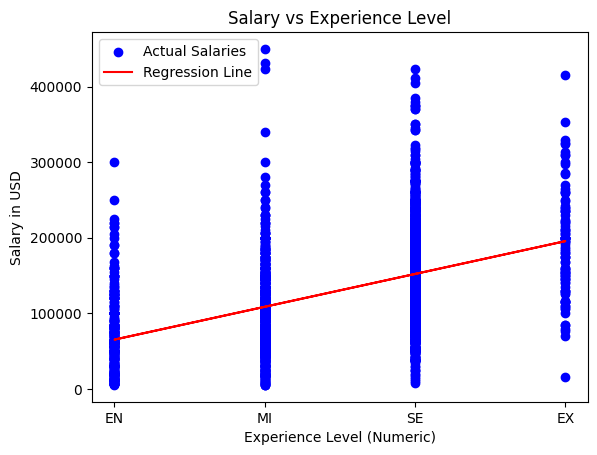

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Mapping experience levels to numeric values
experience_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['experience_numeric'] = df['experience_level'].map(experience_mapping)

# Reshape the data for regression
X = df['experience_numeric'].values.reshape(-1, 1)
y = df['salary_in_usd'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values to plot the regression line
y_pred = model.predict(X)

# Plot scatter of experience levels and salary
plt.scatter(df['experience_numeric'], y, color='blue', label='Actual Salaries')

# Plot the regression line
plt.plot(df['experience_numeric'], y_pred, color='red', label='Regression Line')

# Customize the plot
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level (Numeric)')
plt.ylabel('Salary in USD')
plt.xticks(ticks=[1, 2, 3, 4], labels=['EN', 'MI', 'SE', 'EX'])  # Change numeric ticks to experience labels
plt.legend()

plt.show()

### Observations:

The scatter plot shows a positive relationship between experience level and salary, as indicated by the upward slope of the regression line. However, the wide salary range within each experience level suggests that factors other than experience might influence salary significantly. While higher experience levels generally lead to higher salaries, the relationship is not strictly proportional due to the large variance. Therefore, experience level is not perfectly proportional to salary, although it is an important factor.

3. What is the average salary for each level of experience?

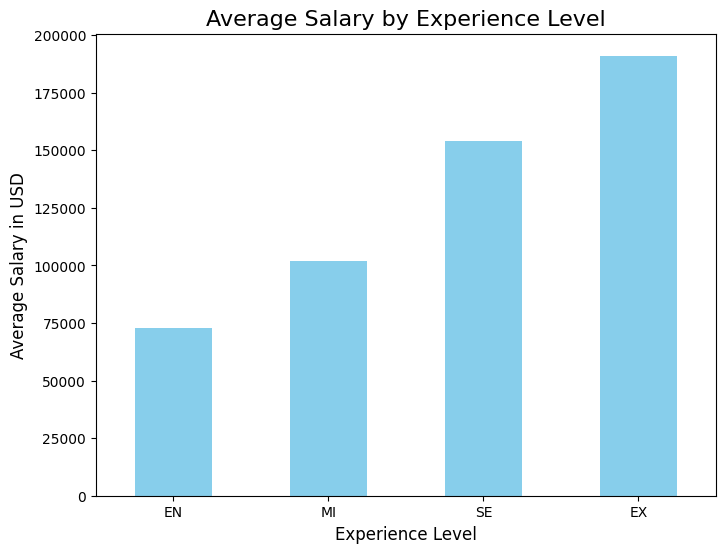

In [37]:
import matplotlib.pyplot as plt

# Calculate the average salary for each experience level
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Ensure the experience levels are in the specified order
experience_order = ['EN', 'MI', 'SE', 'EX']
average_salary_by_experience = average_salary_by_experience.reindex(experience_order)

# Plot the bar chart
plt.figure(figsize=(8, 6))
average_salary_by_experience.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Salary by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

# Display the plot
plt.xticks(rotation=0)  # Ensures the labels on x-axis are horizontal
plt.show()

4. By wich percentage does the salary increase between experience levels?

In [29]:
# Extracting the average salaries in the order of experience levels
salary_EN = average_salary_by_experience['EN']
salary_MI = average_salary_by_experience['MI']
salary_SE = average_salary_by_experience['SE']
salary_EX = average_salary_by_experience['EX']

# Calculating percentage increases between levels
increase_EN_to_MI = ((salary_MI - salary_EN) / salary_EN) * 100
increase_MI_to_SE = ((salary_SE - salary_MI) / salary_MI) * 100
increase_SE_to_EX = ((salary_EX - salary_SE) / salary_SE) * 100


print(f"Increase from Entry-level to Mid-level: {increase_EN_to_MI:.1f}%")
print(f"Increase from Mid-level to Senior-level: {increase_MI_to_SE:.1f}%")
print(f"Increase from Senior-level to Executive: {increase_SE_to_EX:.1f}%")

Increase from Entry-level to Mid-level: 40.2%
Increase from Mid-level to Senior-level: 51.1%
Increase from Senior-level to Executive: 24.2%


5. What company size harbors the most employees?

In [40]:
# Count the number of employees for each company size
employee_count_by_size = df['company_size'].value_counts()

# Identify the company size with the most employees
most_employees_size = employee_count_by_size.idxmax()
most_employees_count = employee_count_by_size.max()

most_employees_size, most_employees_count

('M', np.int64(2028))

6. Which country has higher salary per job title?

In [39]:
# Group by 'job_title' and 'company_location' and calculate the mean salary in USD
salary_by_job_country = df.groupby(['job_title', 'company_location'])['salary_in_usd'].mean()

# Convert the Series to a DataFrame for easier manipulation
salary_by_job_country_df = salary_by_job_country.reset_index()

# Find the country with the highest salary for each job title
highest_salary_per_job = salary_by_job_country_df.loc[salary_by_job_country_df.groupby('job_title')['salary_in_usd'].idxmax()]

# Display the results
highest_salary_per_job

,job_title,company_location,salary_in_usd
2,3D Computer Vision Researcher,CR,50000.000000
8,AI Developer,IN,300000.000000
13,AI Programmer,AU,55000.000000
20,AI Scientist,IL,423834.000000
25,Analytics Engineer,US,157501.000000
...,...,...,...
339,Research Engineer,US,172327.925926
345,Research Scientist,ES,211475.000000
353,Software Data Engineer,SG,75020.000000
354,Staff Data Analyst,CA,15000.000000


7. Wich  experience level is more sought after?


In [41]:
# Count the occurrences of each experience level
experience_demand = df['experience_level'].value_counts()

# Identify the most sought-after experience level
most_sought_level = experience_demand.idxmax()
most_sought_count = experience_demand.max()

most_sought_level, most_sought_count

('SE', np.int64(1554))